<font color="#CA3532"><h1 align="left">**Práctica 2 de Aprendizaje por Refuerzo**</h1></font>
<font color="#6E6E6E"><h2 align="left">**Multiarmed Bandits**</h2></font>

# **Multiarmed bandits para Credit Scoring**

El objetivo es construir un sistema automático de aprendizaje por refuerzo para gestionar un sistema de concesión de créditos.
La idea es que cuando un cliente contacte con el banco para solicitar un crédito, el sistema se lo conceda (acción 1) o no (acción 0).
Por tanto el sistema de aprendizaje por refuerzo tiene **dos posibles acciones**.

Por otra parte, el reward obtenido es:

- 0 si el sistema decide no ofrecerle el crédito al cliente
- 1 si se le ofrece el crédito y **lo paga**
- -10 si se le ofrece crédito y **no lo paga**

Para construir el sistema disponemos del siguiente dataset: https://drive.google.com/file/d/1TdTDAjndt5sn_7HKwc1PifcaQTRNHzkR/view?usp=sharing


A continuación se descarga y muestra:

In [1]:
COLAB = True

In [2]:
import pandas as pd
pd.options.display.max_colwidth = 200

# Descargamos dataset:
aux = "'https://docs.google.com/uc?export=download&id=1twvCaa27x8aOcwkaMyCu-RxgTe3ivVxR&confirm=t'"
!wget -q $aux -O ./cs.csv
aux = "'https://docs.google.com/uc?export=download&id=1yZNmK6yWl3IzvDGxNZRlyZVbh3oxpO_b&confirm=t'"
!wget -q $aux -O ./DataDictionary.csv

/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**Información sobre cada variable:**

In [3]:
info_variables = pd.read_csv("DataDictionary.csv", sep=";").set_index("Variable Name")
info_variables

,Unnamed: 0,Description,Type
Variable Name,,,
SeriousDlqin2yrs,0,Person experienced 90 days past due delinquency or worse,Y/N
RevolvingUtilizationOfUnsecuredLines,1,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
age,2,Age of borrower in years,integer
NumberOfTime30-59DaysPastDueNotWorse,3,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
DebtRatio,4,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
MonthlyIncome,5,Monthly income,real
NumberOfOpenCreditLinesAndLoans,6,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
NumberOfTimes90DaysLate,7,Number of times borrower has been 90 days or more past due.,integer
NumberRealEstateLoansOrLines,8,Number of mortgage and real estate loans including home equity lines of credit,integer


**Base de datos:**

In [4]:
df = pd.read_csv("./cs.csv")
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [5]:
df.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
SeriousDlqin2yrs,150000.0,0.0,1.0,0.066840,0.249746
RevolvingUtilizationOfUnsecuredLines,150000.0,0.0,50708.0,6.048438,249.755371
age,150000.0,0.0,109.0,52.295207,14.771866
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.0,98.0,0.421033,4.192781
DebtRatio,150000.0,0.0,329664.0,353.005076,2037.818523
MonthlyIncome,120269.0,0.0,3008750.0,6670.221237,14384.674215
NumberOfOpenCreditLinesAndLoans,150000.0,0.0,58.0,8.452760,5.145951
NumberOfTimes90DaysLate,150000.0,0.0,98.0,0.265973,4.169304
NumberRealEstateLoansOrLines,150000.0,0.0,54.0,1.018240,1.129771
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.0,98.0,0.240387,4.155179


In [6]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
(df["MonthlyIncome"].isna() & df["NumberOfDependents"].isna()).sum()

3924

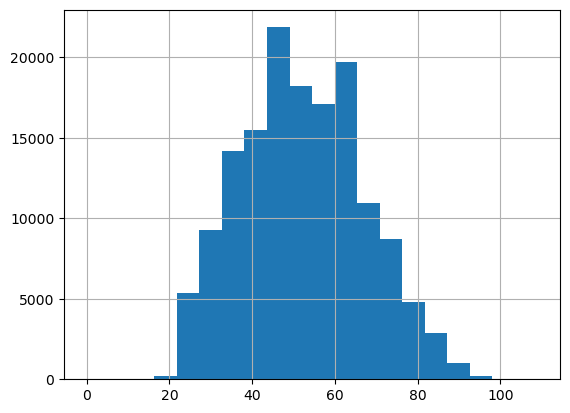

In [8]:
df["age"].hist(bins=20);

In [9]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64

In [10]:
# limpieza básica:
#
# 1- Eliminamos filas con missing values (MonthlyIncome y NumberOfDependents)
# 2- Nos quedamos solo con personas de 18 a 70 años (incluidos)
# 3- Eliminamos filas que tengan 96 o 98 en columnas de retraso
#    (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse,
#     NumberOfTimes90DaysLate)

df.dropna(inplace=True)
df = df[ (df["age"]>=18) & (df["age"]<=70) ]

df = df[ ~df["NumberOfTime30-59DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTime60-89DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTimes90DaysLate"].isin([96, 98]) ]

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,107883.0,0.073728,0.261329,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,107883.0,6.262285,268.425237,0.0,0.042982,0.206481,0.617870,50708.0
age,107883.0,48.343835,11.909195,21.0,39.000000,49.000000,58.000000,70.0
NumberOfTime30-59DaysPastDueNotWorse,107883.0,0.276781,0.739606,0.0,0.000000,0.000000,0.000000,13.0
DebtRatio,107883.0,27.426863,395.986811,0.0,0.162018,0.308917,0.493251,60212.0
MonthlyIncome,107883.0,6800.816625,14941.921271,0.0,3500.000000,5500.000000,8344.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,107883.0,8.774265,5.155074,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,107883.0,0.098588,0.509666,0.0,0.000000,0.000000,0.000000,17.0
NumberRealEstateLoansOrLines,107883.0,1.095233,1.157615,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,107883.0,0.072106,0.348840,0.0,0.000000,0.000000,0.000000,11.0


La columna **SeriousDlqin2yrs** es 0 si el cliente paga el crédito, y 1 si no lo paga.

Ahora dividimos el dataset en training y test:

In [12]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=1, test_size=0.3, stratify=df["SeriousDlqin2yrs"])

In [13]:
# frecuencia de impagos en training y test (en tanto por 1):
df_train["SeriousDlqin2yrs"].mean(), df_test["SeriousDlqin2yrs"].mean()

(0.07373076617495167, 0.073721612853391)

In [14]:
# Defino clase clientes:

class clientes:
    def __init__(self, df): # self: parámetros internos
        # mi clase va a tener dos parámetros internos:
        # i, df
        self.i = -1 # i: contador (de clientes); índice al último cliente mostrado
        self.df = df
    def cliente(self): # va a simular que llega un cliente
        self.i = self.i + 1
        if self.i == len(self.df):
            self.i = 0
    def get_context(self): # va a extraer datos de ese cliente
        return self.df.iloc[self.i].drop("SeriousDlqin2yrs")
    def get_reward(self, accion): # reward con ese cliente
        # calculo reward:
        if accion==0: # no se da crédito
            return 0
        # se da crédito:
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1: # no paga
            return -10
        return 1 # paga

In [15]:
# clientes: una clase
# cl_train: una instancia de esa clase
# cl_test: otra instancia de esa clase
#
# podemos ver cl_train como una "caja" donde hemos
# metido el dataset de entrenamiento y va a haber
# métodos que me permiten interaccionar con él
#
# Lo mismo con cl_test, pero para los datos de test

cl_train = clientes(df_train)
cl_test  = clientes(df_test)

In [16]:
cl_train.cliente() # simulo que llega un cliente nuevo

In [17]:
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines        0.064833
age                                        59.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.156957
MonthlyIncome                           16666.000000
NumberOfOpenCreditLinesAndLoans             5.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          2.000000
Name: 135262, dtype: float64

In [18]:
cl_train.get_context().values

array([6.48325870e-02, 5.90000000e+01, 0.00000000e+00, 1.56956861e-01,
       1.66660000e+04, 5.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 2.00000000e+00])

In [19]:
cl_train.cliente()
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines       0.209079
age                                       30.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.129946
MonthlyIncome                           2400.000000
NumberOfOpenCreditLinesAndLoans            7.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 14308, dtype: float64

In [20]:
cl_train.get_reward(1)

1

# **Tareas a realizar**

1- Calcula la evolución del reward total y regret total en training de:
 a) un algoritmo aleatorio
 b) un algoritmo que siempre da el crédito
 c) un algoritmo que nunca da el crédito

 Calcula en otra gráfica la evolución de su reward promedio y regret promedio. ¿Tienen sentido los resultados?

2- Entrena un multiarmed bandit **no contextual** en training. Calcula las mismas métricas que en el punto 1. ¿Cuál es la estrategia que aprende el modelo?

3- Entrena un multiarmed bandit contextual lineal en training. Calcula las mismas métricas que en los puntos anteriores

4- Calcula, para algunos clientes de training, las Q dadas por el modelo para cada acción. Chequea si obtienes los mismos valores calculándolos tú. Chequea si la acción elegida por el modelo es la de mayor Q.

5- Calcula en test el rendimiento del algoritmo de multiarmed bandit. Compáralo con el grupo de control de test (reserva un 10% de clientes en test como grupo de control).

6- Obtén la interpretabilidad del modelo. ¿En qué variables se está fijando para decidir?

7- Qué ocurre en los puntos anteriores si ahora la penalización cuando el banco da un crédito a un cliente que no paga es -1? ¿Y si se va haciendo aún más pequeña la penalización?

8- Optimiza tu sistema haciendo selección de variables.

9- (Opcional). Investiga otras librerías que permitan implementar multiarmed bandits contextuales no lineales. Toma una de ellas y vuelve a realizar la tarea 3.

### Funciones auxiliares

In [21]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def plot_reward_and_regret_over_time(N, results):
    plt.figure(figsize=(14, 12))
    iterations = range(1, N + 1)

    # Plot 1: Total Reward Evolution
    plt.subplot(2, 2, 1)
    for policy_name, data in results.items():
        plt.plot(iterations, data["total_rewards"], label=policy_name)
    plt.xlabel("Number of Clients")
    plt.ylabel("Total Reward")
    plt.title("Evolution of Total Reward")
    plt.legend()
    plt.grid(True)

    # Plot 2: Total Regret Evolution
    plt.subplot(2, 2, 2)
    for policy_name, data in results.items():
        plt.plot(iterations, data["total_regrets"], label=policy_name)
    plt.xlabel("Number of Clients")
    plt.ylabel("Total Regret")
    plt.title("Evolution of Total Regret")
    plt.legend()
    plt.grid(True)

    # Calculate and Plot Average Reward
    plt.subplot(2, 2, 3)
    for policy_name, data in results.items():
        avg_rewards = [r / i for i, r in zip(iterations, data["total_rewards"])]
        plt.plot(iterations, avg_rewards, label=policy_name)
    plt.xlabel("Number of Clients")
    plt.ylabel("Average Reward")
    plt.title("Evolution of Average Reward")
    plt.legend()
    plt.grid(True)

    # Calculate and Plot Average Regret
    plt.subplot(2, 2, 4)
    for policy_name, data in results.items():
        avg_regrets = [r / i for i, r in zip(iterations, data["total_regrets"])]
        plt.plot(iterations, avg_regrets, label=policy_name)
    plt.xlabel("Number of Clients")
    plt.ylabel("Average Regret")
    plt.title("Evolution of Average Regret")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


def simulate_policy(policy, policy_name, cl_train_dim, results):
    # Store results
    history_total_rewards = []
    history_total_regrets = []
    
    current_total_reward = 0
    current_total_regret = 0

    for step in tqdm(range(N), desc=f"Simulating {policy_name} policy"):
        cl_train_sim.cliente() # Get next client
        context = cl_train_sim.get_context().values.astype(np.float64) 
        
        # Determine action based on policy
        action = policy.action(context)

        # Get actual reward for the chosen action
        actual_reward = cl_train_sim.get_reward(action)

        policy.update(context, action, actual_reward)
        
        # Optimal reward calculation
        reward_if_action_0 = 0

        if cl_train_sim.df.iloc[cl_train_sim.i]["SeriousDlqin2yrs"] == 1:
            reward_if_action_1 = -10
        else:
            reward_if_action_1 = 1
        
        optimal_reward_for_client = max(reward_if_action_0, reward_if_action_1)
        
        # Determine regret
        regret = optimal_reward_for_client - actual_reward
        
        current_total_reward += actual_reward
        current_total_regret += regret
        
        history_total_rewards.append(current_total_reward)
        history_total_regrets.append(current_total_regret)

    results[policy_name] = {
        "total_rewards": history_total_rewards,
        "total_regrets": history_total_regrets
    }

### Tarea 1

In [23]:
class RandomPolicy:
    def __init__(self):
        pass

    def action(self, context):
        return np.random.choice([0, 1])

    def update(self, context, action, reward):
        pass

class AlwaysGrantPolicy:
    def __init__(self):
        pass

    def action(self, context):
        return 1

    def update(self, context, action, reward):
        pass
    
class NeverGrantPolicy:
    def __init__(self):
        pass

    def action(self, context):
        return 0

    def update(self, context, action, reward):
        pass

In [24]:
N = len(df_train) # Number of clients in training set

# Store results for plotting
results = {}

# Define policies
policies = {
    "Random": RandomPolicy(),
    "Always Grant": AlwaysGrantPolicy(),
    "Never Grant": NeverGrantPolicy()
}

# Simulate each policy
for policy_name, policy_func in policies.items():
    cl_train_sim = clientes(df_train.copy()) # Fresh simulation environment
    simulate_policy(policy_func, policy_name, cl_train_sim, results)

Simulating Never Grant policy: 100%|██████████| 75518/75518 [00:19<00:00, 3813.30it/s]


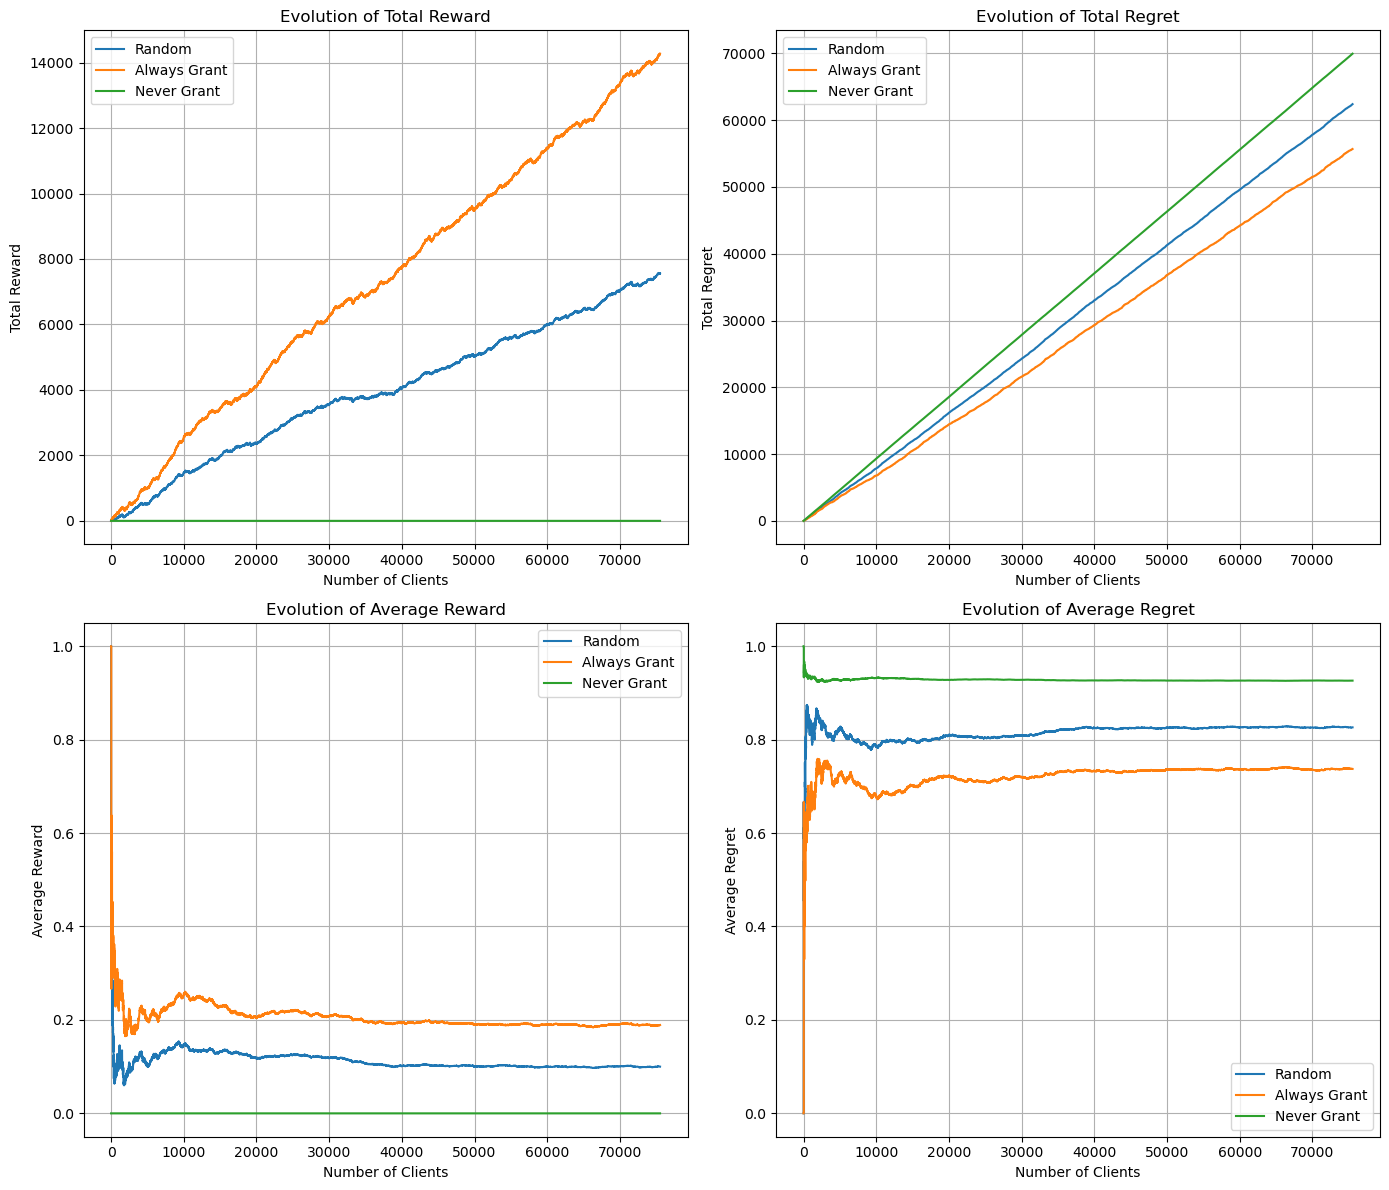

In [25]:
plot_reward_and_regret_over_time(N, results)

In [26]:
# For discussion: Calculate P(pays) and P(no_pays) from training data
p_no_pay_train = df_train["SeriousDlqin2yrs"].mean()
p_pay_train = 1 - p_no_pay_train
print(f"P(no_pay) in training: {p_no_pay_train:.4f}")
print(f"P(pay) in training: {p_pay_train:.4f}")

P(no_pay) in training: 0.0737
P(pay) in training: 0.9263


#### Respuesta:

El algoritmo que peores resultados muestra es el que nunca concede el crédito; esto es consistente con los resultados puesto que dadas las observaciones del dataset, un 92.6% de los clientes terminan pagando sus deudas, por lo que, con los refuerzos actuales resulta mejor el modelo que concede siempre el crédito.

Un modelo intermedio es conceder los créditos aleatoriamente, esta estrategia obtiene de la misma formas resultados intermedios entre los dos modelos extremos.

Finalmente podemos concluir que con el problema actual (los refuerzos establecidos y el dataset utilizado) los modelos ordenados de mejor a peor son: **Always Grant** > **Random** > **Never Grant**

### Tarea 2

In [27]:
class EpsilonGreedyMAB:
    def __init__(self, num_actions, epsilon=0.1):
        self.num_actions = num_actions
        self.epsilon = epsilon
        self.q_values = np.zeros(num_actions)  # Estimated rewards for each action
        self.action_counts = np.zeros(num_actions) # How many times each action was chosen

    def action(self, context):
        if np.random.rand() < self.epsilon:
            # Explore: choose a random action
            return np.random.choice(self.num_actions)
        else:
            # Exploit: choose the action with the highest q_value
            # If multiple actions have the same max q_value, choose one randomly among them
            best_actions = np.where(self.q_values == np.max(self.q_values))[0]
            return np.random.choice(best_actions)

    def update(self, context, action, reward):
        self.action_counts[action] += 1
        # Incremental average update rule
        self.q_values[action] += (1 / self.action_counts[action]) * (reward - self.q_values[action])

In [28]:
# Initialize bandit
epsilon_mab = EpsilonGreedyMAB(num_actions=2, epsilon=0.1)
policy_name = "Epsilon-Greedy MAB"

# Simulate policy
cl_train_sim = clientes(df_train.copy()) # Fresh simulation environment
simulate_policy(epsilon_mab, policy_name, cl_train_sim, results)

print(f"\nEpsilon-Greedy MAB final Q-values: {epsilon_mab.q_values}")
print(f"Epsilon-Greedy MAB action counts: {epsilon_mab.action_counts}")

Simulating Epsilon-Greedy MAB policy: 100%|██████████| 75518/75518 [00:26<00:00, 2860.05it/s]


Epsilon-Greedy MAB final Q-values: [0.         0.18488966]
Epsilon-Greedy MAB action counts: [ 3832. 71686.]


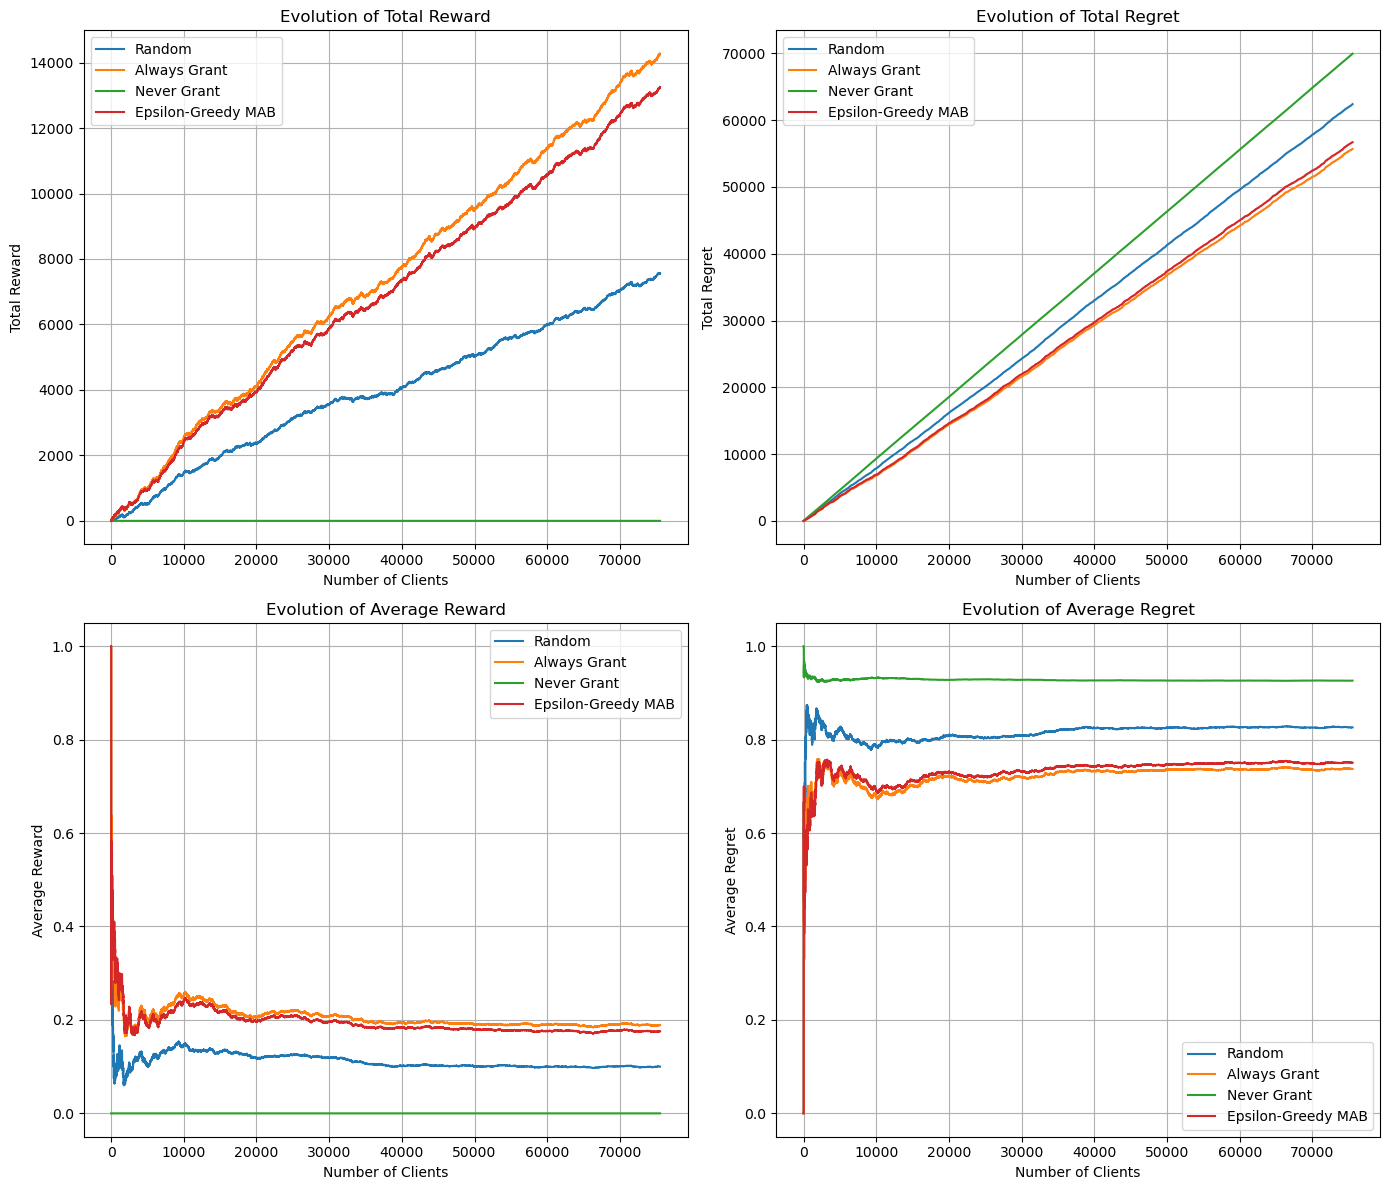

In [29]:
plot_reward_and_regret_over_time(N, results)

#### Respuesta:

Revisando los *q-values* observamos como el modelo aprende a conceder siempre el crédito. Esto se debe a que el modelo es avaricioso y por tanto escogerá la acción con el q-value más grande. 

En este caso el q-value correpondiente a la acción de rechazar el crédito es menor que el q-value correspondiente a la acción de conceder el crédito (0 < 0.187) por lo que siempre concederá el crédito a excepción de la aleatoriedad que introduce $ \epsilon $ para la exploración. 

Dado que $ \epsilon $ es constante, siempre hay una aleatoriedad que provoca obtener menos reward y más regret a este modelo, obteniendo un rendimiento ligeramente inferior al modelo que siempre concede el crédito.

### Tarea 3

In [30]:
if COLAB:
  aux = "'https://docs.google.com/uc?export=download&id=1RGxAJE4jAJAdhsoMyXiYPiqiRUd7y2KR&confirm=t'"
  !wget $aux -O ./spacebandits.zip
  !unzip -qq -o ./spacebandits
  !rm ././spacebandits.zip

--2025-05-20 09:10:58--  https://docs.google.com/uc?export=download&id=1RGxAJE4jAJAdhsoMyXiYPiqiRUd7y2KR&confirm=t
Resolving docs.google.com (docs.google.com)... 142.250.184.174, 2a00:1450:4003:800::200e
Connecting to docs.google.com (docs.google.com)|142.250.184.174|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1RGxAJE4jAJAdhsoMyXiYPiqiRUd7y2KR&export=download [following]
--2025-05-20 09:10:59--  https://drive.usercontent.google.com/download?id=1RGxAJE4jAJAdhsoMyXiYPiqiRUd7y2KR&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.200.97, 2a00:1450:4003:80c::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.200.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22144 (22K) [application/octet-stream]
Saving to: ‘./spacebandits.zip’

./spacebandits.zip  100%[===================>]  21.62K  --.-KB/s 

In [31]:
from space_bandits import LinearBandits

2025-05-20 09:11:02.133329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-20 09:11:02.683323: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-05-20 09:11:02.683357: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-05-20 09:11:02.744281: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-20 09:11:04.070021: W tensorflow/stream_executor/platform/de

Instructions for updating:
non-resource variables are not supported in the long term


In [32]:
_temp_client_instance = clientes(df_train.iloc[:1]) # Small df to get context structure
_temp_client_instance.cliente()
num_features = len(_temp_client_instance.get_context().values)

# Initialize LinearBandits model
contextual_mab = LinearBandits(num_actions=2, num_features=num_features) 
policy_name = "Contextual_Linear_MAB"

cl_train_sim = clientes(df_train.copy()) # Fresh simulation environment
simulate_policy(contextual_mab, policy_name, cl_train_sim, results)

Simulating Contextual_Linear_MAB policy: 100%|██████████| 75518/75518 [15:08<00:00, 83.09it/s]  


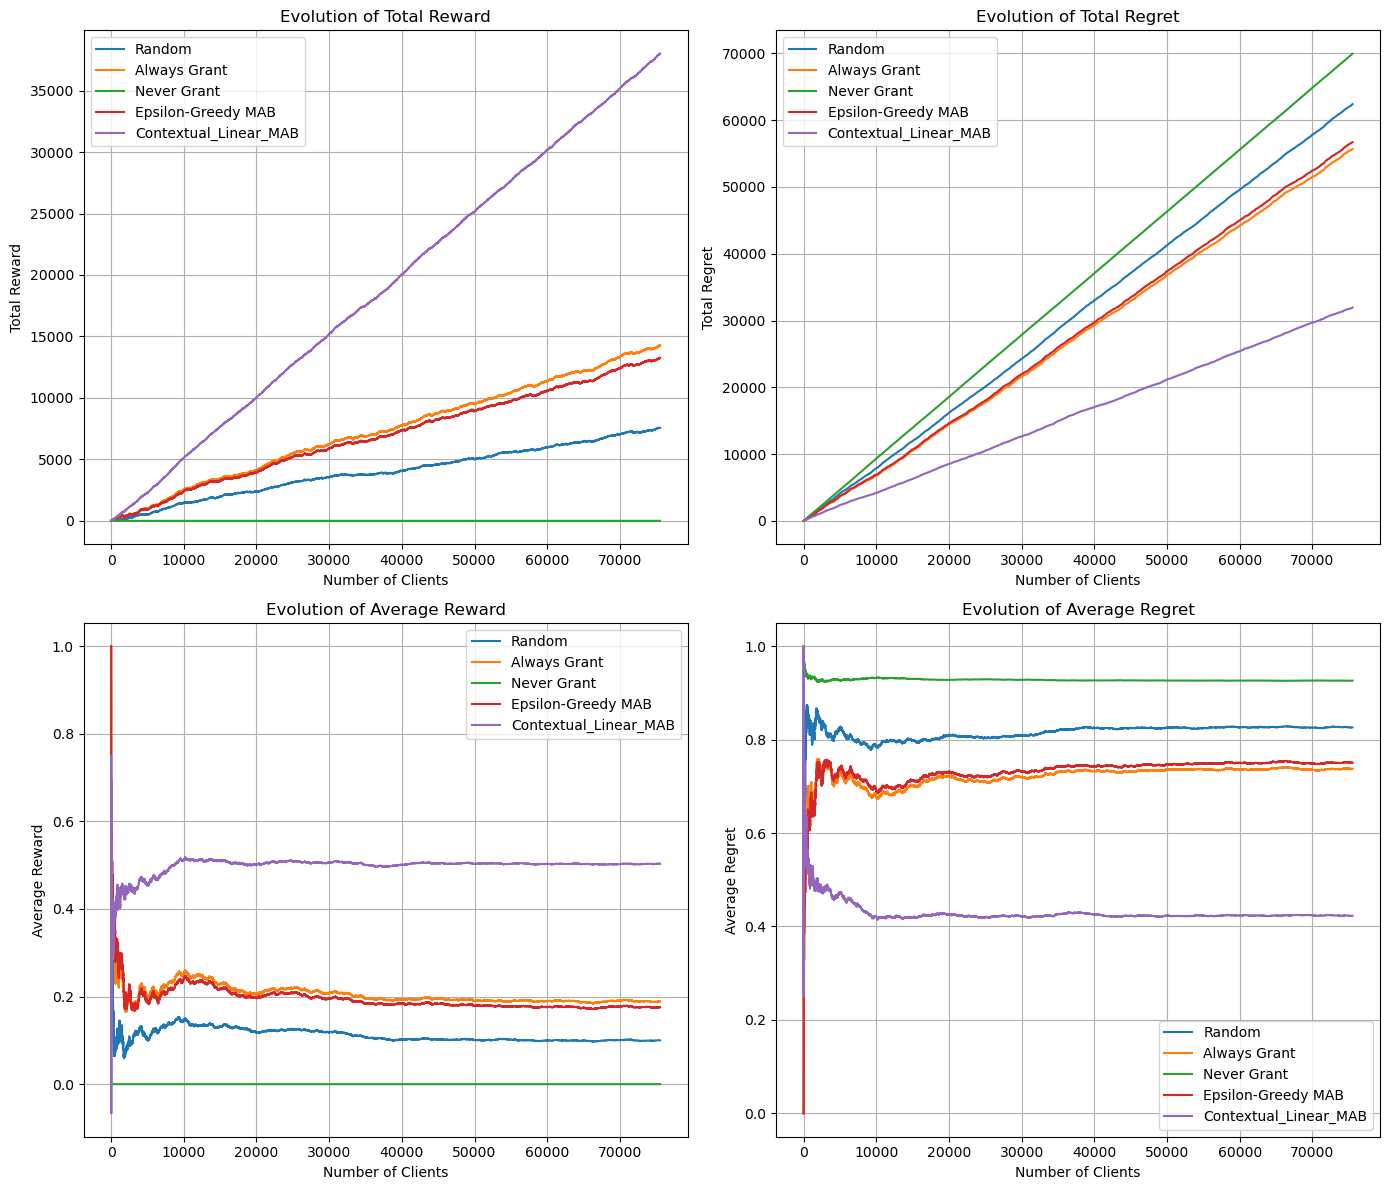

In [33]:
plot_reward_and_regret_over_time(N, results)

#### Respuesta:

Añadiendo contexto al modelo para que tenga en cuenta tanto los refuerzos obtenidos previamente como el contexto de los clientes, se consiguen resultados mucho más favorables que el resto de modelos previamente estudiados. Se puede apreciar en las gráficas como casi triplica la recompensa final y la recompensa media final obtenidas comparado con el mejor modelo previo cuya política era conceder todos los créditos.

### Tarea 4

In [34]:
num_clients_to_check = 3

sample_indices = np.random.choice(df_train.index, size=min(num_clients_to_check, len(df_train)), replace=False)
sample_clients_df = df_train.loc[sample_indices]

print(f"--- Analysing Q-values for {len(sample_clients_df)} sample clients ---\n")

for i, client_idx in enumerate(sample_clients_df.index):
    # Calculate Q-values    
    client_data = sample_clients_df.loc[client_idx]                         # Retrieve client context
    client_context_series = client_data.drop("SeriousDlqin2yrs")            # Remove target variable
    context_np_original = client_context_series.values.astype(np.float64)   # Turn context to array
    context_with_intercept = np.append(context_np_original, 1.0)            # Append 1.0 for intercept

    q_calculated_action0 = np.dot(context_with_intercept, contextual_mab.mu[0])
    q_calculated_action1 = np.dot(context_with_intercept, contextual_mab.mu[1])
    q_values_calculated = np.array([q_calculated_action0, q_calculated_action1])

    # Agent Q-values 
    q_values_agent = contextual_mab.expected_values(context_np_original)

    # Best action according to the Q-values
    best_action_by_calculated_q = np.argmax(q_values_calculated)

    # Action chosen by the model
    agent_chosen_action = contextual_mab.action(context_np_original)

    # Print
    print(f"\nClient {i+1} (Index: {client_idx}):")
    print(f"  Calculated Q-values: {q_values_calculated}")
    print(f"  Agent Q-values: {q_values_agent}")
    print(f"  Action with highest calculated Q-value: {best_action_by_calculated_q}")
    print(f"  Action chosen by the agent: {agent_chosen_action}")

    if np.all(np.isclose(q_values_agent, q_values_calculated)):
        print("  The Q-values match.")
    else: 
        print("  The Q-values don't match.")
    
    if agent_chosen_action == best_action_by_calculated_q:
        print("  The actions match.")
    else: 
        print("  The actions don't match.")

--- Analysing Q-values for 3 sample clients ---


Client 1 (Index: 139035):
  Calculated Q-values: [0.         0.45309618]
  Agent Q-values: [0.         0.45309618]
  Action with highest calculated Q-value: 1
  Action chosen by the agent: 1
  The Q-values match.
  The actions match.

Client 2 (Index: 25762):
  Calculated Q-values: [0.         0.56924395]
  Agent Q-values: [0.         0.56924395]
  Action with highest calculated Q-value: 1
  Action chosen by the agent: 1
  The Q-values match.
  The actions match.

Client 3 (Index: 90434):
  Calculated Q-values: [0.         0.71911158]
  Agent Q-values: [0.         0.71911158]
  Action with highest calculated Q-value: 1
  Action chosen by the agent: 1
  The Q-values match.
  The actions match.


#### Respuesta:

Como se puede apreciar en la salida del comando, tanto los *Q-values* calculados a partir de los coeficientes de los modelos lineales (un modelo por acción) como los *Q-values* obtenidos por el modelo directamente coinciden. 

Esto se ve reforzado por el hecho de que coinciden tanto la acción sugerida por el modelo como la calculada manualmente.

### Tarea 5

In [35]:
def evaluate_agent(agent, data, data_name):
    print(f"\nEvaluando el modelo con el conjunto {data_name}.")
    
    cl_test = clientes(data.copy()) # Fresh simulation environment ### si no funicona intentar esto cl_test = clientes(data.reset_index(drop=True))
    num_clients = len(data)
    
    total_reward = 0
    total_regret = 0
    
    for _ in range(num_clients):
        cl_test.cliente() # Get next client
        client_context = cl_test.get_context().values.astype(np.float64) 
        
        action = agent.action(client_context) # Determine action
        
        # Reward calculation
        actual_reward = cl_test.get_reward(action)
        total_reward += actual_reward

        # Regret calculation
        reward_if_action_0 = 0

        if cl_test.df.iloc[cl_test.i]["SeriousDlqin2yrs"] == 1:
            reward_if_action_1 = -10
        else:
            reward_if_action_1 = 1
        
        optimal_reward_for_client = max(reward_if_action_0, reward_if_action_1)
        
        regret = optimal_reward_for_client - actual_reward
        total_regret += regret

    
    avg_reward = total_reward / num_clients
    avg_regret = total_regret / num_clients
    print(f"  Average reward: {avg_reward:.4f}")
    print(f"  Average regret: {avg_regret:.4f}")

In [36]:
df_test_1, df_test_control = train_test_split(df_test, random_state=42, test_size=0.1, stratify=df_test["SeriousDlqin2yrs"])
                                              
print(f"Tamaño del conjunto de test: {len(df_test_1)} clientes")
print(f"Tamaño del conjunto de control: {len(df_test_control)} clientes")                                     
             
evaluate_agent(contextual_mab, df_test_1, "test")
evaluate_agent(contextual_mab, df_test_control, "control")

Tamaño del conjunto de test: 29128 clientes
Tamaño del conjunto de control: 3237 clientes

Evaluando el modelo con el conjunto test.
  Average reward: 0.5163
  Average regret: 0.4100

Evaluando el modelo con el conjunto control.
  Average reward: 0.5375
  Average regret: 0.3886


In [37]:
train_average_reward = results['Contextual_Linear_MAB']['total_rewards'][-1] / len(results['Contextual_Linear_MAB']['total_rewards'])
train_average_regret = results['Contextual_Linear_MAB']['total_regrets'][-1] / len(results['Contextual_Linear_MAB']['total_regrets'])
print(f"Train average reward: {train_average_reward}")
print(f"Train average regret: {train_average_regret}")

Train average reward: 0.5031912921422708
Train average regret: 0.4230779416827776


#### Respuesta:

El rendimiento obtenido del modelo es consistente para los tres grupos estudiados (train, test y control), indicando una falta de sobreajuste y un modelo que parece generalizar correctamente.

Con este split conseguimos resultados superiores en test y control a train.

### Tarea 6

/tmp/ipykernel_81/4286913633.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


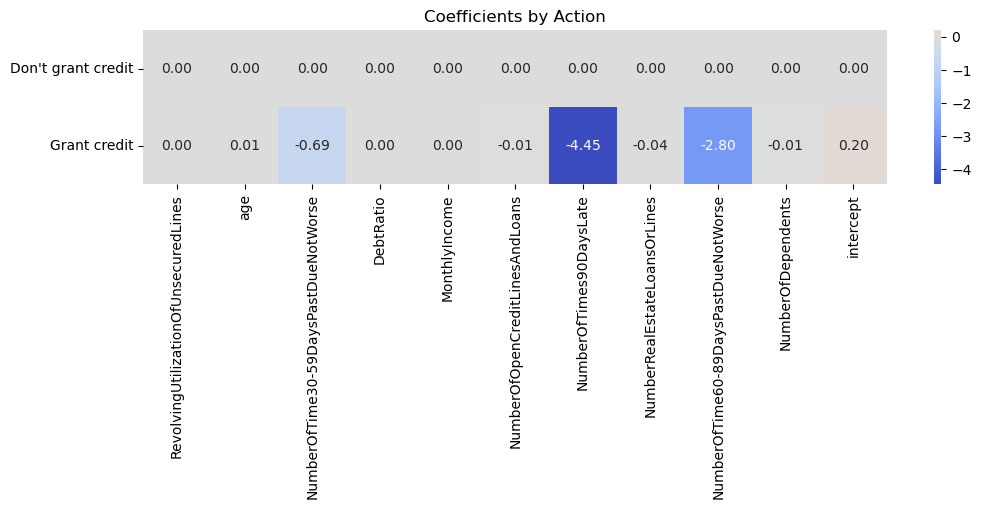

In [38]:
import seaborn as sns

coeffs_action0 = np.array(contextual_mab.mu[0])
coeffs_action1 = np.array(contextual_mab.mu[1])

feature_names = df_train.drop(columns=["SeriousDlqin2yrs"]).columns.tolist()
feature_names.append('intercept')
feature_names = np.array(feature_names)

coeffs_df = pd.DataFrame(
    [coeffs_action0, coeffs_action1],
    index=["Don't grant credit", "Grant credit"],
    columns=feature_names
)

# Plot the table with colored cells
plt.figure(figsize=(12, 2))  # adjust width as needed
sns.heatmap(coeffs_df, annot=True, cmap='coolwarm', cbar=True, center=0, fmt=".2f")
plt.title("Coefficients by Action")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

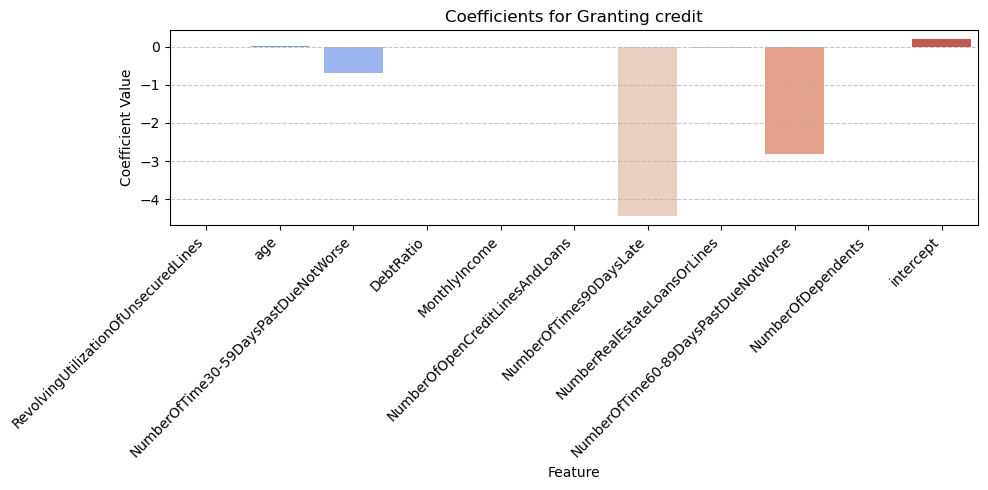

In [39]:
# Create DataFrame for plotting
coeffs_series = pd.Series(coeffs_action1, index=feature_names)

# Barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=coeffs_series.index, y=coeffs_series.values, palette="coolwarm")

plt.title("Coefficients for Granting credit")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Respuesta:

Al revisar las la tabla con los coeficientes se aprecia como el Q-value de la Acción 0 (rechazar el crédito) siempre será igual a 0, esto significa que la decisión sobre qué acción tomar la va a realizar el modelo correspondiente con la Acción 1 (conceder el crédito); si los coeficientes son positivos, dichas variables influirán en que el crédito sea aprobado, mientras que si los coeficientes son negativos nos indica que las variables correspondientes influirán a rechazar el crédito. Con esto dicho aquí hay un resumen de todas las variables:

 - Las siguientes variables no afectan significativamente a la decisión del modelo: DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfDependents, age y NumberRealEstateLoansOrLines.
 - Las variables más significativas a la hora de decidir si rechazar el crédito son: RevolvingUtilizationOfUnsecuredLines, NumberOfTimes30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate y NumberOfTime60-89DaysPastDueNotWorse.
 - La variable más significativa para aceptar el crédito es: intercept.

Dado que el *intercept* es el único coeficiente con un valor positivo alto, podemos deducir que el modelo está decidiendo si no concede el crédito en base a las variables con coeficientes negativos y, en caso de no ser suficiente la evidencia para rechazarlo, el modelo concederá el crédito.

Si indagamos más profundamente en las variables utilizadas para rechazar el crédito, el modelo da mucho peso a los clientes que en el pasado se han retrasado en el pago de de su crédito.

### Tarea 7

In [40]:
#TODO: En esta sección falta probar con penalizaciones más pequeñas

In [41]:
# Defino clase clientes:
class clientes2:
    def __init__(self, df): # self: parámetros internos
        # mi clase va a tener dos parámetros internos:
        # i, df
        self.i = -1 # i: contador (de clientes); índice al último cliente mostrado
        self.df = df
    def cliente(self): # va a simular que llega un cliente
        self.i = self.i + 1
        if self.i == len(self.df):
            self.i = 0
    def get_context(self): # va a extraer datos de ese cliente
        return self.df.iloc[self.i].drop("SeriousDlqin2yrs")
    def get_reward(self, accion): # reward con ese cliente
        # calculo reward:
        if accion==0: # no se da crédito
            return 0
        # se da crédito:
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1: # no paga
            return -1
        return 1 # paga

Simulating Contextual Linear MAB policy: 100%|██████████| 75518/75518 [16:05<00:00, 78.20it/s]  


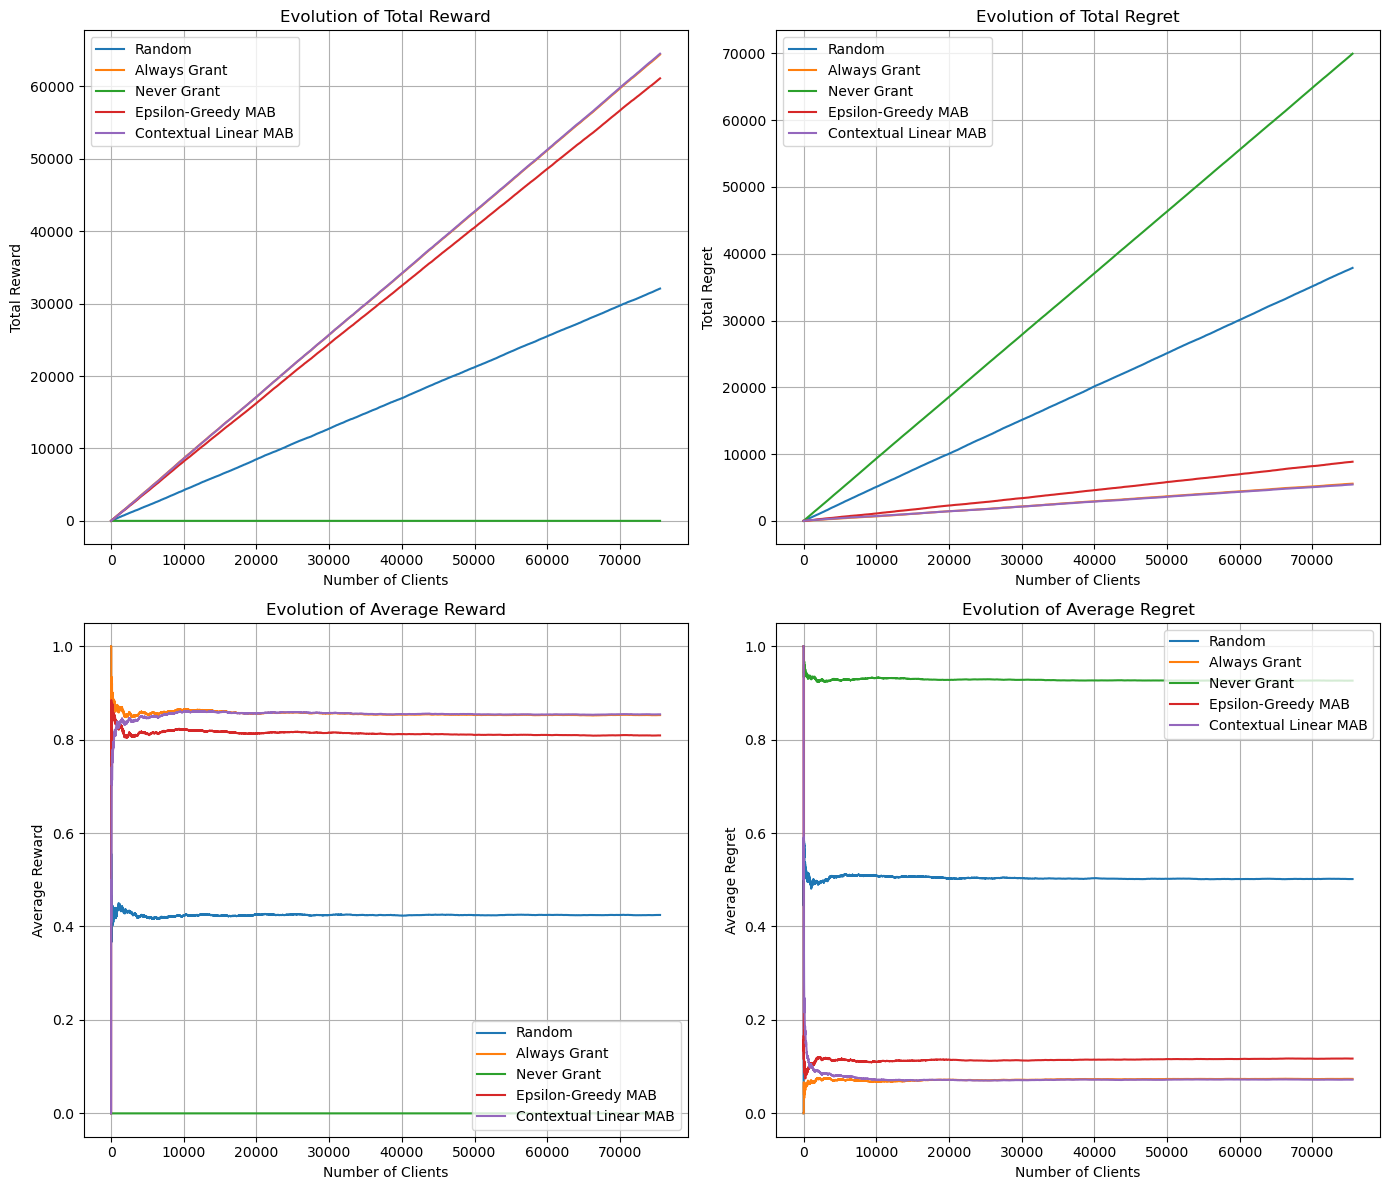

In [42]:
num_features = len(_temp_client_instance.get_context().values)

policies = {
    "Random": RandomPolicy(),
    "Always Grant": AlwaysGrantPolicy(),
    "Never Grant": NeverGrantPolicy(),
    "Epsilon-Greedy MAB": EpsilonGreedyMAB(num_actions=2, epsilon=0.1),
    "Contextual Linear MAB": LinearBandits(num_actions=2, num_features=num_features)
}

N = len(df_train) # Number of clients in training set
results2 = {}

# Simulate each policy
for policy_name, policy_func in policies.items():
    cl_train_sim = clientes2(df_train.copy()) # Fresh simulation environment
    simulate_policy(policy_func, policy_name, df_train, results2)

plot_reward_and_regret_over_time(N, results2)

#### Respuesta:

TODO

In [43]:
contextual_mab2 = policies["Contextual Linear MAB"]

df_test_1, df_test_control = train_test_split(df_test, random_state=42, test_size=0.1, stratify=df_test["SeriousDlqin2yrs"])
                                              
print(f"Tamaño del conjunto de test: {len(df_test_1)} clientes")
print(f"Tamaño del conjunto de control: {len(df_test_control)} clientes")                                     
             
evaluate_agent(contextual_mab, df_test_1, "test")
evaluate_agent(contextual_mab, df_test_control, "control")

Tamaño del conjunto de test: 29128 clientes
Tamaño del conjunto de control: 3237 clientes

Evaluando el modelo con el conjunto test.
  Average reward: 0.5152
  Average regret: 0.4111

Evaluando el modelo con el conjunto control.
  Average reward: 0.5388
  Average regret: 0.3874


In [44]:
train_average_reward = results['Contextual_Linear_MAB']['total_rewards'][-1] / len(results['Contextual_Linear_MAB']['total_rewards'])
train_average_regret = results['Contextual_Linear_MAB']['total_regrets'][-1] / len(results['Contextual_Linear_MAB']['total_regrets'])
print(f"Train average reward: {train_average_reward}")
print(f"Train average regret: {train_average_regret}")

Train average reward: 0.5031912921422708
Train average regret: 0.4230779416827776


#### Respuesta:

TODO

/tmp/ipykernel_81/2779398405.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


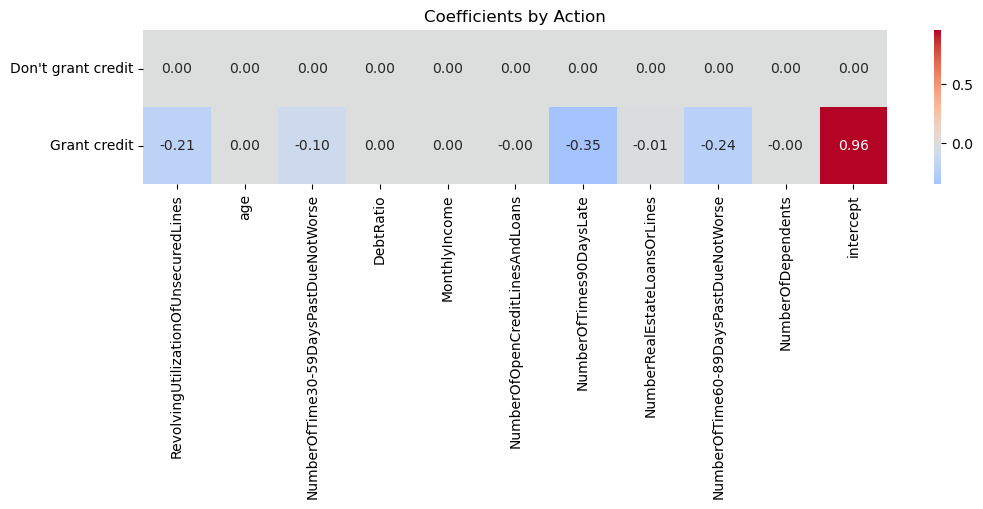

In [45]:
coeffs_action0 = np.array(contextual_mab2.mu[0])
coeffs_action1 = np.array(contextual_mab2.mu[1])

feature_names = df_train.drop(columns=["SeriousDlqin2yrs"]).columns.tolist()
feature_names.append('intercept')
feature_names = np.array(feature_names)

coeffs_df = pd.DataFrame(
    [coeffs_action0, coeffs_action1],
    index=["Don't grant credit", "Grant credit"],
    columns=feature_names
)

# Plot the table with colored cells
plt.figure(figsize=(12, 2))  # adjust width as needed
sns.heatmap(coeffs_df, annot=True, cmap='coolwarm', cbar=True, center=0, fmt=".2f")
plt.title("Coefficients by Action")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Respuesta:

TODO

### Tarea 8

Escoger las variables que más afecten al sistema y borrar el resto, evaluar el rendimiento (recursos: tiempo/espacio) en comparación con el modelo que tiene en cuenta todas las variables.

Queremos reducir la dimensionalidad de los datos para mejorar la eficiencia computacional, simplificar el modelo de forma que se evita sobreajuste (aunque nuestro modelo no tenía sobreajuste previo) y se mejore su estabilidad en general.

Para esta tarea vamos utilizar el modelo de las tareas 3-6.

Si nos fijamos en la tarea 6 donde hacemos un estudio de la interpretabilidad del modelo podemos hacer una criba de variables poco significativas:

Las siguientes variables serán eliminadas puesto que no afectan significativamente a la decisión del modelo: DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfDependents, age y NumberRealEstateLoansOrLines.

In [46]:
# Defino clase clientes:
class clientes_optim:
    def __init__(self, df): # self: parámetros internos
        # mi clase va a tener dos parámetros internos:
        # i, df
        self.i = -1 # i: contador (de clientes); índice al último cliente mostrado
        self.df = df
    def cliente(self): # va a simular que llega un cliente
        self.i = self.i + 1
        if self.i == len(self.df):
            self.i = 0
    def get_context(self): # va a extraer datos de ese cliente
        return self.df.iloc[self.i].drop([  'DebtRatio',
                                            'MonthlyIncome',
                                            'NumberOfOpenCreditLinesAndLoans',
                                            'NumberOfDependents',
                                            'age',
                                            'NumberRealEstateLoansOrLines',
                                            'SeriousDlqin2yrs'])
    def get_reward(self, accion): # reward con ese cliente
        # calculo reward:
        if accion==0: # no se da crédito
            return 0
        # se da crédito:
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1: # no paga
            return -1
        return 1 # paga

In [47]:
_temp_client_instance = clientes_optim(df_train.iloc[:1]) # Small df to get context structure
_temp_client_instance.cliente()
num_features = len(_temp_client_instance.get_context().values)

# Initialize LinearBandits model
contextual_mab = LinearBandits(num_actions=2, num_features=num_features) 
policy_name = "Contextual_Linear_MAB_optim"

cl_train_sim = clientes_optim(df_train.copy()) # Fresh simulation environment
simulate_policy(contextual_mab, policy_name, cl_train_sim, results)

Simulating Contextual_Linear_MAB_optim policy: 100%|██████████| 75518/75518 [28:34<00:00, 44.03it/s]  


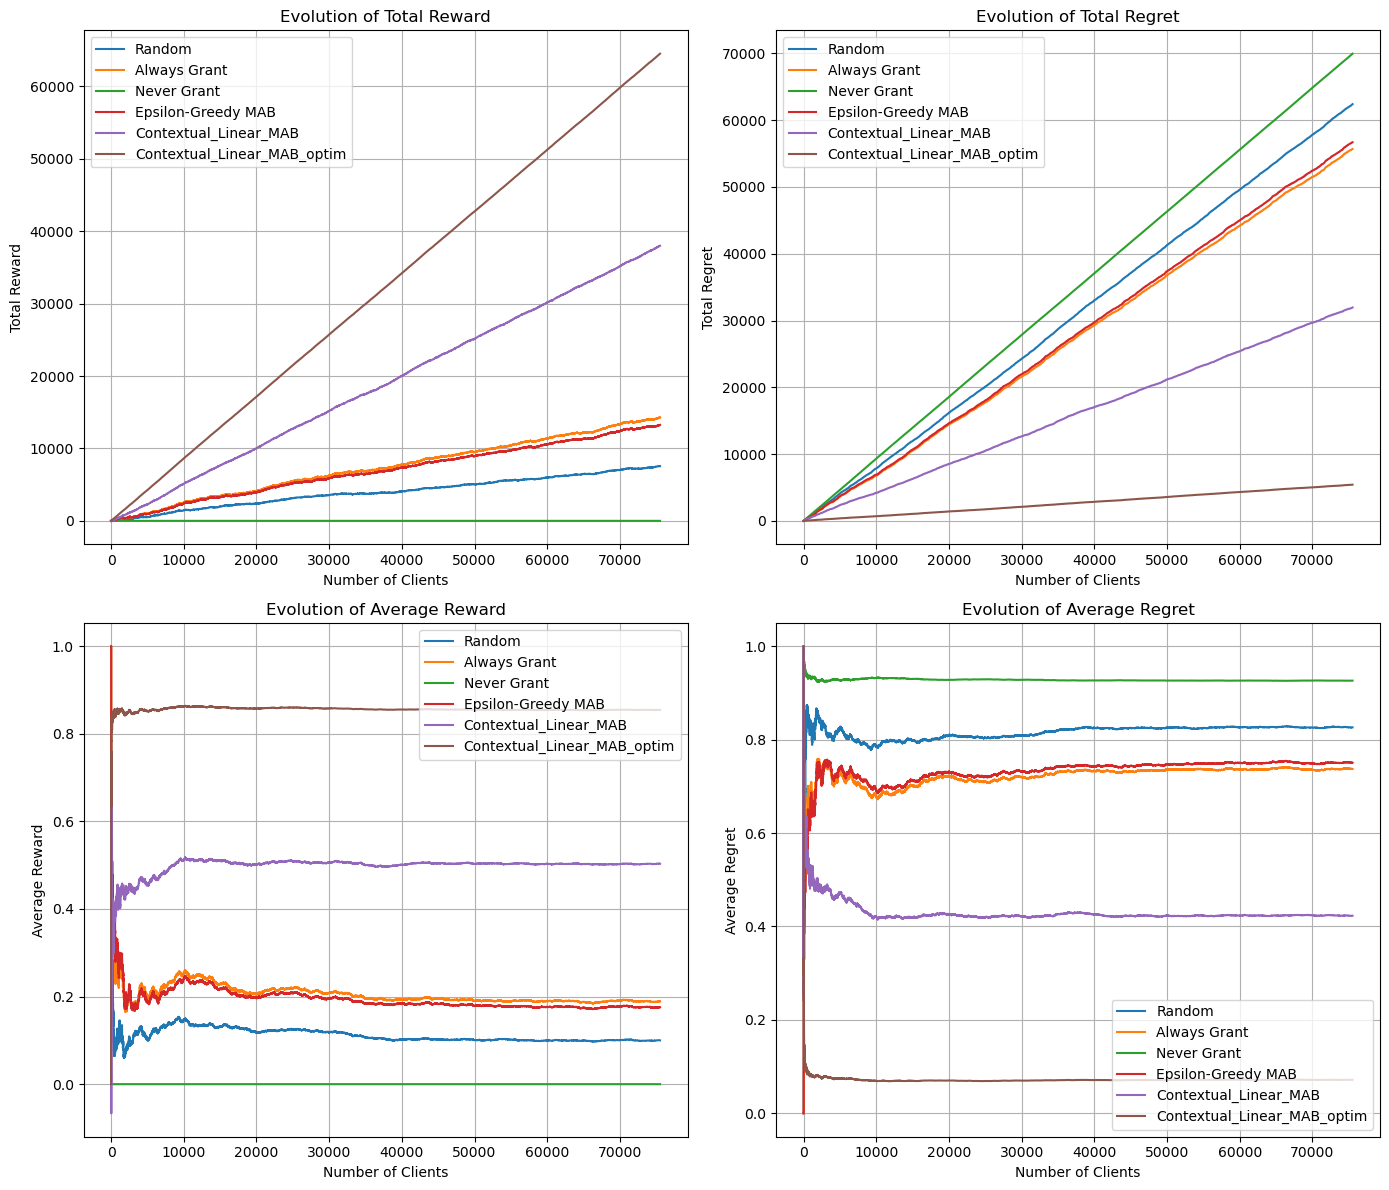

In [48]:
plot_reward_and_regret_over_time(N, results)

### Tarea 9 (opcional)